In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

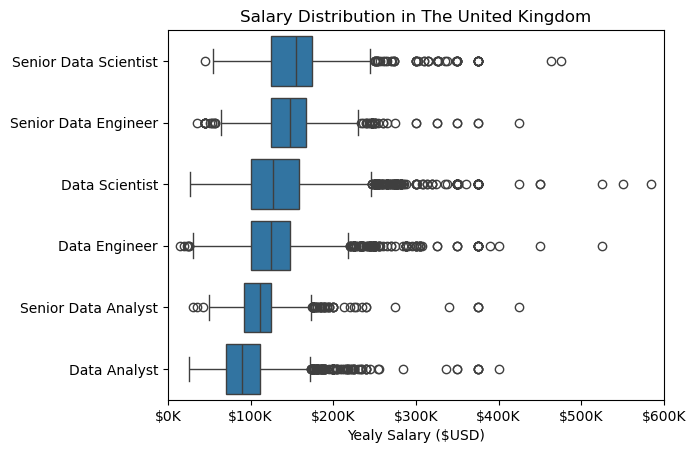

In [75]:
job_country = "United Kingdom"

df_first = df[df['job_country'] == job_country].dropna(subset='salary_year_avg')

job_titles = df_first['job_title_short'].value_counts().index[:6].to_list()

df_top6 = df[df['job_title_short'].isin(job_titles)]

job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title(f'Salary Distribution in The {job_country}')
plt.xlabel('Yealy Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

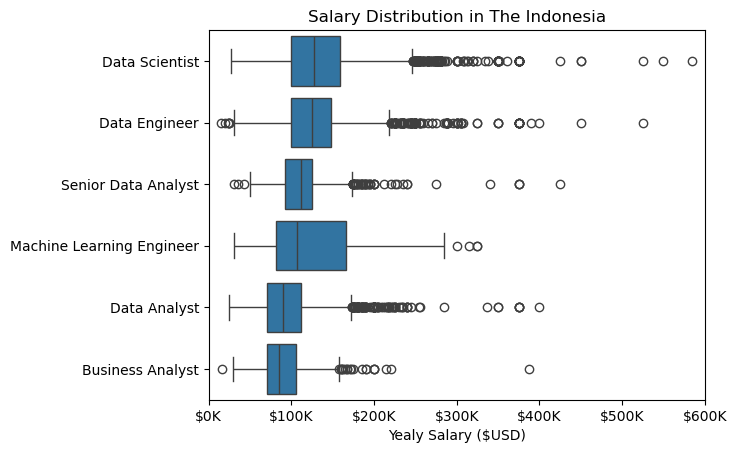

In [58]:
job_country = "Indonesia"

df_first = df[df['job_country'] == job_country].dropna(subset='salary_year_avg')

job_titles = df_first['job_title_short'].value_counts().index[:6].to_list()

df_top6 = df[df['job_title_short'].isin(job_titles)]

job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title(f'Salary Distribution in The {job_country}')
plt.xlabel('Yealy Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [71]:
df.groupby('job_country')['job_title_short'].size().sort_values(ascending=False)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Bhutan                 3
Lesotho                3
Mauritania             3
Maldives               2
Name: job_title_short, Length: 160, dtype: int64

In [55]:
# job_titles = df['job_title_short'].unique().tolist()
# job_titles = [title for title in job_titles if "Data" in title ]